In [1]:
!wget https://kaityo256.github.io/python_zero/file/popmap.zip

--2019-11-05 05:42:06--  https://kaityo256.github.io/python_zero/file/popmap.zip
Resolving kaityo256.github.io (kaityo256.github.io)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to kaityo256.github.io (kaityo256.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42407 (41K) [application/zip]
Saving to: ‘popmap.zip’

popmap.zip          100%[===================>]  41.41K  --.-KB/s    in 0.01s   

2019-11-05 05:42:11 (3.07 MB/s) - ‘popmap.zip’ saved [42407/42407]



In [2]:
!unzip -o popmap.zip

Archive:  popmap.zip
  inflating: population.csv          
  inflating: position.csv            


In [3]:
!head population.csv

01000,北海道,5543556
01100,札幌市,1884939
01101,札幌市中央区,206252
01102,札幌市北区,273577
01103,札幌市東区,252688
01104,札幌市白石区,203579
01105,札幌市豊平区,208476
01106,札幌市南区,147397
01107,札幌市西区,209883
01108,札幌市厚別区,129604


In [4]:
!head position.csv

01100,札幌市役所,43.06197200,141.35437400
01202,函館市役所,41.76871200,140.72910800
01203,小樽市役所,43.19075267,140.99460538
01204,旭川市役所,43.77079900,142.36479800
01205,室蘭市役所,42.31520400,140.97378400
01206,釧路市役所,42.98485600,144.38167000
01207,帯広市役所,42.92401400,143.19619500
01208,北見市役所,43.80782300,143.89438400
01209,夕張市役所,43.05681400,141.97406900
01210,岩見沢市役所,43.19616900,141.77585700


In [0]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [0]:
d_pop = {}
with open("population.csv") as f:
  for line in f:
    code, _, pop = line.split(",")
    d_pop[int(code)] = int(pop)

In [0]:
data = []
with open("position.csv") as f:
  for line in f:
    a = line.strip().split(",")
    if len(a) < 4:
      continue
    code, _, y, x = a
    code = int(code)
    x, y = float(x), float(y)
    if code in d_pop:
      data.append((x, y, d_pop[code]))

In [0]:
data = sorted(data, key=lambda x: x[2])

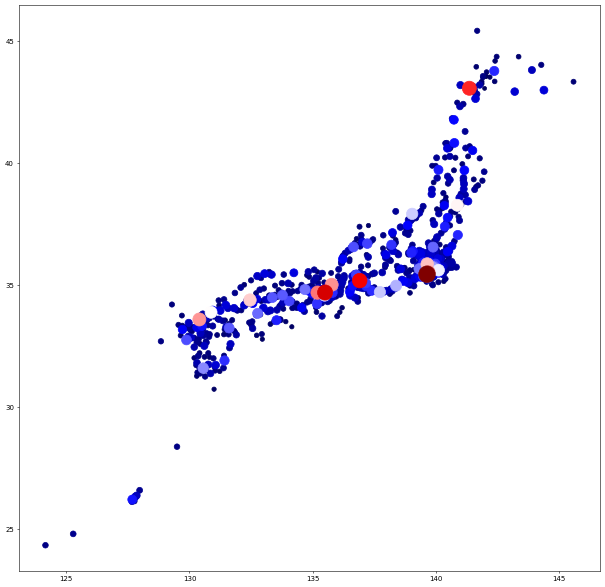

In [16]:
nx, ny, nn = [] ,[] ,[]
for x, y, n in data:
  nx.append(x)
  ny.append(y)
  nn.append(n**0.5*0.3)
plt.figure(figsize=(15, 15), dpi=50)
plt.scatter(nx, ny, c=nn, s=nn, cmap=cm.seismic)